#ch3-1. K-최근접 이웃 회귀(K-Nearest Neighbors Regressor)


STEP1. 데이터를 Train과 Test로 나누기

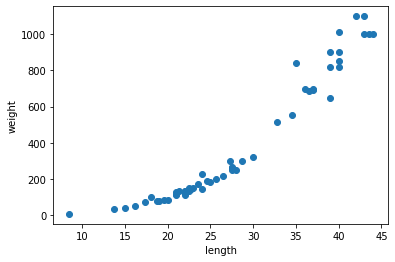

(42, 1) (14, 1)


array([  85.,  135.,   78.,   70.,  700.,  180.,  850.,  820., 1000.,
        120.,   85.,  130.,  225.,  260., 1100.,  900.,  145.,  115.,
        265., 1015.,  514.,  218.,  685.,   32.,  145.,   40.,  690.,
        840.,  300.,  170.,  650.,  110.,  150.,  110., 1000.,  150.,
         80.,  700.,  120.,  197., 1100.,  556.])

In [41]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)  # 훈련 세트와 테스트 세트를 적당한 비율로 섞음

# test_array=np.array([1,2,3,4])
# print(test_array)
# test_array = test_array.reshape(2,2)
# print(test_array)

# train_input.size
train_input = train_input.reshape(-1,1)   #2차원 배열로 만들기: 1차원(42x0) -> 2차원(42x1)
test_input = test_input.reshape(-1,1)
print(train_input.shape,test_input.shape)

train_target

STEP2. Fitting 후 결정계수(coefficient of determination) 비교하기

In [160]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

knr.fit(train_input,train_target)
print({"train socre": knr.score(train_input, train_target)})
print({"test score": knr.score(test_input, test_target)}) # 결과는 "결정계수"로 1에 가까울수록 예측이 타깃에 가까워지고 0에 가까울수록 예측이 평균에 가까워짐
# test > train : underfitting, test < train: 점수차이가 클 경우는는 overfitting

from sklearn.metrics import mean_absolute_error
test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
print(mae)  # 결과는 (타깃-예측)의 절대값들의 평균이 19 라는 뜻

{'train socre': 0.9806793318005479}
{'test score': 0.9916579819676246}
20.72857142857143


STEP3. 이웃 개수 조절하여 다시 Fitting

In [161]:
knr.n_neighbors = 3   #이웃의 개수를 default(5) -> 3으로 변경해여 국지적인 패턴에 민감하게 만듦
knr.fit(train_input,train_target)
print({"train socre": knr.score(train_input, train_target)})
print({"test score": knr.score(test_input, test_target)})

{'train socre': 0.9840261830467693}
{'test score': 0.9933421291365472}


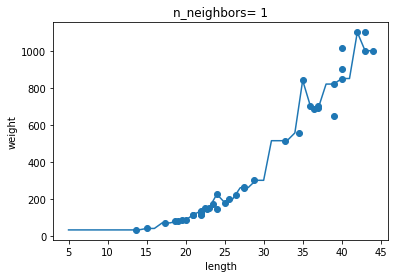

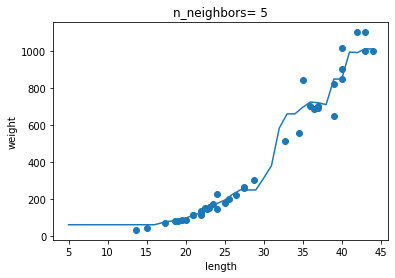

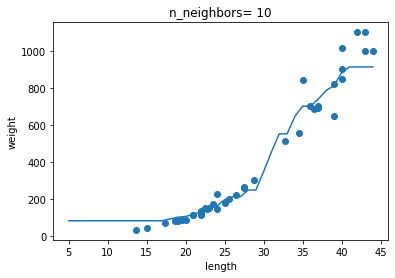

In [62]:
x=np.arange(5,45).reshape(-1,1)
for n in[1,5,10]:
  knr.n_neighbors = n
  knr.fit(train_input,train_target)
  prediction = knr.predict(x)
  plt.scatter(train_input, train_target)
  plt.plot(x,prediction)
  plt.title('n_neighbors= {}'.format(n))
  plt.xlabel('length')
  plt.ylabel('weight')
  plt.show()

#ch3-2. 선형회귀(Linear Regression) & 다항회귀(Polynomial Regression)

STEP1. K최근접 이웃회귀의 문제점: 새로운 샘플이 훈련 범위를 넘어가면 기존 데이터의 값을 예측

{'50cm 물고기의 Weight 예측값': array([1033.33333333])}
{'이웃들의 평균': 1033.3333333333333}


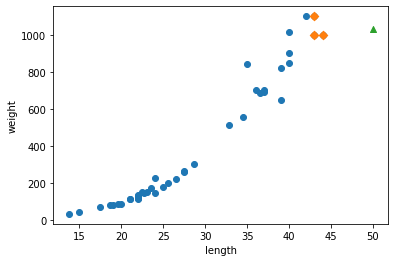

In [80]:
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)
train_input = train_input.reshape(-1,1)   #2차원 배열로 만들기: 1차원(42x0) -> 2차원(42x1)
test_input = test_input.reshape(-1,1)

knr.n_neighbors = 3
knr.fit(train_input, train_target)

print({"50cm 물고기의 Weight 예측값":knr.predict([[50]])})  # 문제 발생: 50cm 물고기의 무게가 1033g로 예측했는데, 실제로는 1200g 이라면?

distances, indexes = knr.kneighbors([[50]])

#50cm&1033g 물고기와 그 이웃을 그래프에 나타내기
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')

print({"이웃들의 평균": np.mean(train_target[indexes])})

#문제 원인: 새로운 샘플이 Train 범위를 벗어나면 이상한 값을 예측

STEP2. 선형회귀를 통한 Fitting, 음수에 대한 문제 발생생

[1241.83860323]
[39.01714496] -709.0186449535477
{'test score': 0.8247503123313558}
{'train socre': 0.939846333997604}


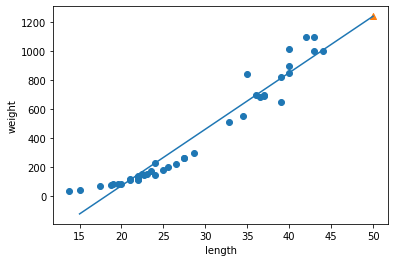

In [92]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

lr.fit(train_input, train_target)

print(lr.predict([[50]]))
print(lr.coef_,lr.intercept_)

plt.scatter(train_input, train_target)
plt.plot([15,50],[15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')

print({"test score": lr.score(test_input, test_target)})
print({"train socre": lr.score(train_input, train_target)})
# underfitting 된 상태, weight를 음수로 예측할 수 있음

STEP3. 다항회귀를 통한 Fitting

(42, 2) (14, 2)
[1573.98423528]
[  1.01433211 -21.55792498] 116.0502107827827


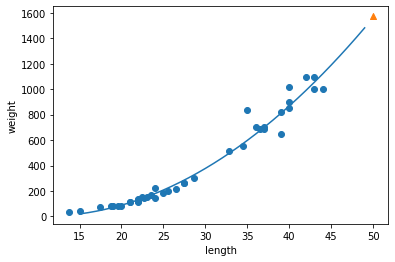

{'train score': 0.9706807451768623}
{'test socre': 0.9775935108325122}


In [95]:
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

print(train_poly.shape, test_poly.shape)

lr.fit(train_poly,train_target)

print(lr.predict([[50**2,50]]))

print(lr.coef_,lr.intercept_)

point=np.arange(15,50)
plt.scatter(train_input, train_target)
plt.plot(point,1.01*point**2+-21.6*point+116.05)
plt.scatter(50, 1574, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

print({"train score": lr.score(train_poly, train_target)})
print({"test socre": lr.score(test_poly, test_target)})
# 결정계수의 점수가 오름, but여전히 underfitting

#ch3-3 다중회귀(Multiple Regression): 더 복잡한 모델을 만들어 성능을 높이기

STEP1. length, height, width 특성을 pandas 를 통해 불러오기기

In [156]:
from numpy.lib.polynomial import polymul
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
# print(perch_full)

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

STEP2. 특성을 만들기 위해 사이킷런 변환기(Transformer)를 통해 9개의 특성으로 변환하여 Fitting

In [159]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)  # 훈련 세트와 테스트 세트를 적당한 비율로 섞음

from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(include_bias=False)

# poly.fit([[2,3]]) -> poly.transform([[2,3]])
#poly.fit_transform([[2,3]])  --> array([[2., 3., 4., 6., 9.]])

poly.fit(train_input) #train_input 에서 특성 검출
train_poly=poly.transform(train_input)  #검출한 특성의 데이터들을 변환
print(train_poly.shape)
print(poly.get_feature_names_out())

test_poly = poly.transform(test_input)  #test 데이터의 input은 어차피 train_input과 특성이 같기 때문에 fit을 할 필요없음. train 데이터의 특성을 기준으로 test도 변환환

lr.fit(train_poly, train_target)
print({"train score": lr.score(train_poly, train_target)})
print({"test socre": lr.score(test_poly, test_target)})


# underfitting 해결

(42, 9)
['x0' 'x1' 'x2' 'x0^2' 'x0 x1' 'x0 x2' 'x1^2' 'x1 x2' 'x2^2']
{'train score': 0.9903183436982125}
{'test socre': 0.9714559911594111}


STEP3. 특성을 9개에서 더 추가하여 Fitting 하기
-> Overfitting 발생(특성의 개수를 늘릴수록 선형모델은 성능이 강해지지만 train set에 overfitting)

In [162]:
poly=PolynomialFeatures(degree=5, include_bias=False)   # 특성을 추가(기존은 2제곱이고 3제곱과 4제곱을 추가)
poly.fit(train_input) 
train_poly=poly.transform(train_input)  
test_poly = poly.transform(test_input)
print(train_poly.shape)
print(poly.get_feature_names_out())

lr.fit(train_poly, train_target)
print({"train score": lr.score(train_poly, train_target)})
print({"test socre": lr.score(test_poly, test_target)})
# 특성의 개수를 늘릴수록 선형모델은 성능이 강해지지만 train set에 overfitting된다.


(42, 55)
['x0' 'x1' 'x2' 'x0^2' 'x0 x1' 'x0 x2' 'x1^2' 'x1 x2' 'x2^2' 'x0^3'
 'x0^2 x1' 'x0^2 x2' 'x0 x1^2' 'x0 x1 x2' 'x0 x2^2' 'x1^3' 'x1^2 x2'
 'x1 x2^2' 'x2^3' 'x0^4' 'x0^3 x1' 'x0^3 x2' 'x0^2 x1^2' 'x0^2 x1 x2'
 'x0^2 x2^2' 'x0 x1^3' 'x0 x1^2 x2' 'x0 x1 x2^2' 'x0 x2^3' 'x1^4'
 'x1^3 x2' 'x1^2 x2^2' 'x1 x2^3' 'x2^4' 'x0^5' 'x0^4 x1' 'x0^4 x2'
 'x0^3 x1^2' 'x0^3 x1 x2' 'x0^3 x2^2' 'x0^2 x1^3' 'x0^2 x1^2 x2'
 'x0^2 x1 x2^2' 'x0^2 x2^3' 'x0 x1^4' 'x0 x1^3 x2' 'x0 x1^2 x2^2'
 'x0 x1 x2^3' 'x0 x2^4' 'x1^5' 'x1^4 x2' 'x1^3 x2^2' 'x1^2 x2^3' 'x1 x2^4'
 'x2^5']
{'train score': 0.9999999999996433}
{'test socre': -144.40579436844948}


STEP4. 규제(Regulation): 과도하게 학습하지 못하게 막는것으로 선형회귀모델에서는 특성에 곱해지는 계수(기울기)를 작게하는 것


STEP4-1. Train Set의 Score는 줄이고 Test Set의 Score를 높이기 위해 우선 정규화(Normalize)를 진행

In [136]:
# 정규화 <- 특성들간의 스케일 차이
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

# print(ss.mean_, ss.scale_, sep='\n')

STEP4-2. 릿지(Ridge) 회귀와 하이퍼 파라미터 구하기

{'train score': 0.9896101671037343}
{'test socre': 0.9790693977615387}


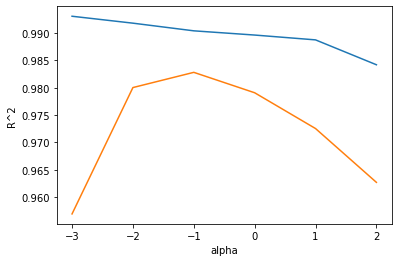

{'train score': 0.9903815817570367}
{'test socre': 0.9827976465386928}


In [146]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(train_scaled, train_target)

print({"train score": ridge.score(train_scaled, train_target)})
print({"test socre": ridge.score(test_scaled, test_target)})

train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  ridge = Ridge(alpha=alpha)
  ridge.fit(train_scaled, train_target)
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()


ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print({"train score": ridge.score(train_scaled, train_target)})
print({"test socre": ridge.score(test_scaled, test_target)})

STEP4-3. 라쏘(Lasso) 회귀와 하이퍼 파라미터 구하기

{'train score': 0.989789897208096}
{'test socre': 0.9800593698421883}


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


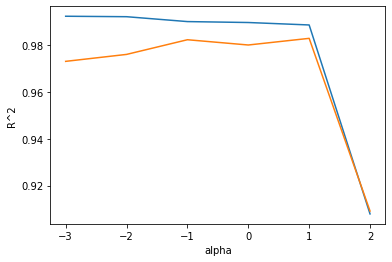

{'train score': 0.9888067471131867}
{'test socre': 0.9824470598706695}
{'number of 0 coefficient': 40}


In [152]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(train_scaled, train_target)

print({"train score": lasso.score(train_scaled, train_target)})
print({"test socre": lasso.score(test_scaled, test_target)})


train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  lasso = Lasso(alpha=alpha, max_iter=10000)  #반복계산 횟수
  lasso.fit(train_scaled, train_target)
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print({"train score": lasso.score(train_scaled, train_target)})
print({"test socre": lasso.score(test_scaled, test_target)})

print({"number of 0 coefficient": np.sum(lasso.coef_==0)})